Chapter 3 TIME SERIES ANALYSIS AND ITS COMPONENTS

In [139]:
# Load the librarie - Numpy,Panda,Statsmodels and Matplotlib
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [183]:
df_diesel_price = pd.read_csv("diesel_price.csv")
df_diesel_price.head()

,Sale_Date,Diesel price
0,16-04-2022,5.00
1,17-04-2022,6.00
2,18-04-2022,5.60
3,18-04-2022,5.12
4,21-04-2022,5.10


In [184]:
df_diesel_price["Sale_Date"]=pd.to_datetime(df_diesel_price["Sale_Date"],infer_datetime_format=True)
index=df_diesel_price.set_index(["Sale_Date"])
from datetime import datetime
index.head()

,Diesel price
Sale_Date,
2022-04-16,5.00
2022-04-17,6.00
2022-04-18,5.60
2022-04-18,5.12
2022-04-21,5.10


				********************************************
				   Visualization of Diesel Price Vs Date    
				********************************************


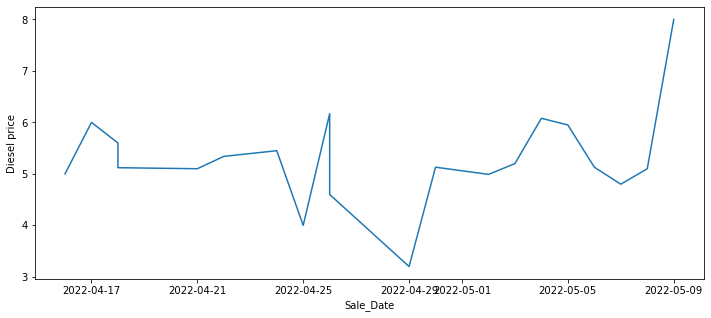

In [185]:
print("\t\t\t\t********************************************")
print("\t\t\t\t   Visualization of Diesel Price Vs Date    ")
print("\t\t\t\t********************************************")
plt.figure(figsize=(12,5))
plt.xlabel("Sale_Date")
plt.ylabel("Diesel price")
plt.plot(index)

In [186]:
print("******************************")
print("Dickey-fuller Test - Result")
print("******************************")
#calling adfuller function for diesel price with autolag='AIC'
df_adftest = adfuller(df_diesel_price["Diesel price"],autolag='AIC')
#getting output from df_adftest
dfoutput=pd.Series(df_adftest[0:4],index=['Test Statistic','p-value','#lags used','Observation numbers for test'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

******************************
Dickey-fuller Test - Result
******************************
Test Statistic                  -0.859970
p-value                          0.800869
#lags used                       8.000000
Observation numbers for test    11.000000
critical value (1%)             -4.223238
critical value (5%)             -3.189369
critical value (10%)            -2.729839
dtype: float64


Rolling Statistics Test

Augmented dickey-fuller test :
test statistic value -0.859970 is not less than the critical values at different percentage (1% =>-4.22 ,5% =>-3.18 ,10% =>-2.72) In this case, we cannot reject null hypothesis and we can conclude that data is not stationary

				*****************************
				  Rolling Statistics Test
				*****************************


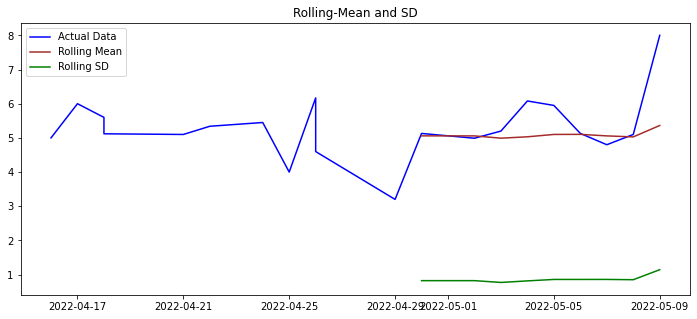

In [99]:
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
print("\t\t\t\t*****************************")
print("\t\t\t\t  Rolling Statistics Test")
print("\t\t\t\t*****************************")
plt.figure(figsize=(12,5))
orig=plt.plot(index , color='blue',label="Actual Data")
mean= plt.plot(rmean , color='brown',label="Rolling Mean")
std=plt.plot(rstd,color='green',label = "Rolling SD")
plt.legend(loc='best')
plt.title("Rolling-Mean and SD")
plt.show()

Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test

In [13]:
from statsmodels.tsa.stattools import kpss

In [106]:
print("*****************************")
print("KPSS Test - Results          ")
print("*****************************")
kpsstest = kpss(df_diesel_price["Diesel price"], regression="c", nlags="auto")
kpss_output = pd.Series(kpsstest[0:3], index=["Test Statistic","p-value","#Lags Used"])
for key,value in kpsstest[3].items():
    kpss_output["Critical Value (%s)"%key] = value
print (kpss_output)

*****************************
KPSS Test - Results          
*****************************
Test Statistic           0.195304
p-value                  0.100000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\pandi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [209]:
df_diesel_price = pd.read_csv("diesel_price.csv")
df_diesel_price.head()
df_diesel_price["Sale_Date"]=pd.to_datetime(df_diesel_price["Sale_Date"],infer_datetime_format=True)
index=df_diesel_price.set_index(["Sale_Date"])
index.head()


,Diesel price
Sale_Date,
2022-04-16,5.00
2022-04-17,6.00
2022-04-18,5.60
2022-04-18,5.12
2022-04-21,5.10


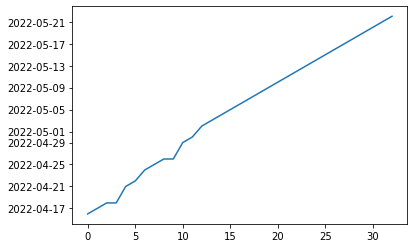

In [210]:
df_diesel_price['Sale_Date'].plot()

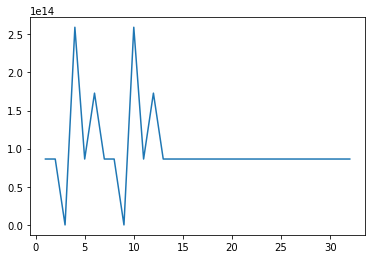

In [211]:
df_diesel_price["Sale_Date"] = df_diesel_price["Sale_Date"] - df_diesel_price["Sale_Date"].shift(1)
df_diesel_price["Sale_Date"].dropna().plot()

In [198]:
print("******************************")
print("Dickey-fuller Test - Result")
print("******************************")
#calling adfuller function for diesel price with autolag='AIC'
df_adftest = adfuller(df_diesel_price["Diesel price"],autolag='AIC')
#getting output from df_adftest
dfoutput=pd.Series(df_adftest[0:4],index=['Test Statistic','p-value','#lags used','Observation numbers for test'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

******************************
Dickey-fuller Test - Result
******************************
Test Statistic                  -0.859970
p-value                          0.800869
#lags used                       8.000000
Observation numbers for test    11.000000
critical value (1%)             -4.223238
critical value (5%)             -3.189369
critical value (10%)            -2.729839
dtype: float64


In [19]:
df_diesel_price = pd.read_csv("diesel_price.csv")
df_diesel_price.head()

,Sale_Date,Diesel price,Detrend by a differencing
0,16-04-2022,5.00,0.00
1,17-04-2022,6.00,1.00
2,18-04-2022,5.60,-0.40
3,18-04-2022,5.12,-0.48
4,21-04-2022,5.10,-0.02


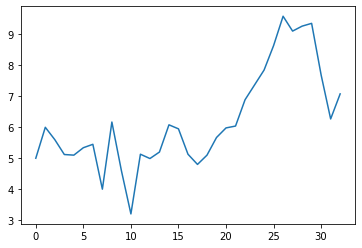

In [21]:
df_diesel_price["Diesel price"].plot()

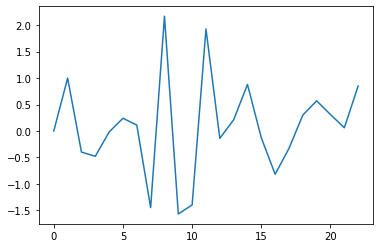

In [20]:
df_diesel_price["Detrend by a differencing"].plot()

In [138]:
df_diesel_price = pd.read_csv("diesel_price.csv")
df_diesel_price.head()
df_diesel_price["Sale_Date"]=pd.to_datetime(df_diesel_price["Sale_Date"],infer_datetime_format=True)
index=df_diesel_price.set_index(["Sale_Date"])
index.head()

,Diesel price,Detrend by a differencing,Predicted values,Detrend After Predicted
Sale_Date,,,,
2022-04-16,5.00,0.00,5.26,0.26
2022-04-17,6.00,1.00,6.09,0.09
2022-04-18,5.60,-0.40,5.76,0.16
2022-04-18,5.12,-0.48,5.36,0.24
2022-04-21,5.10,-0.02,5.35,0.25


<Axes: >

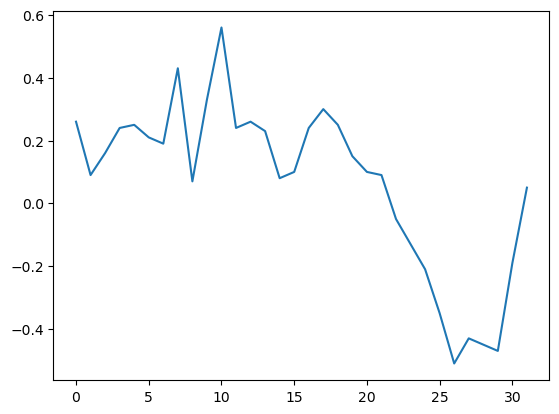

In [8]:
df_diesel_price["Detrend After  Predicted"].plot()

<Axes: >

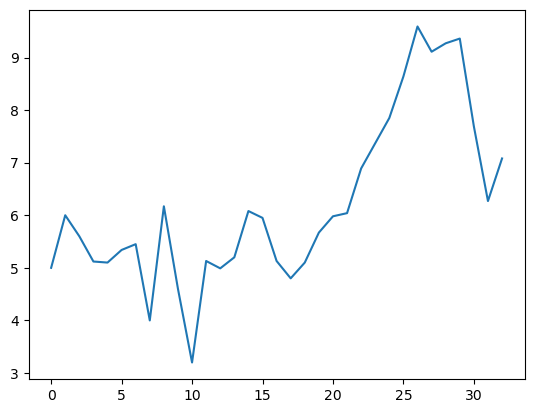

In [9]:
df_diesel_price["Diesel price"].plot()

In [20]:
#Transformation - Square Root
df_log=np.sqrt(df_diesel_price["Diesel price"])
df_diff_diesel_price=df_log.diff().dropna()

In [29]:
df_diff_diesel_price.head(5)

1    0.213422
2   -0.083058
3   -0.103690
4   -0.004424
5    0.052526
Name: Diesel price, dtype: float64

<Axes: >

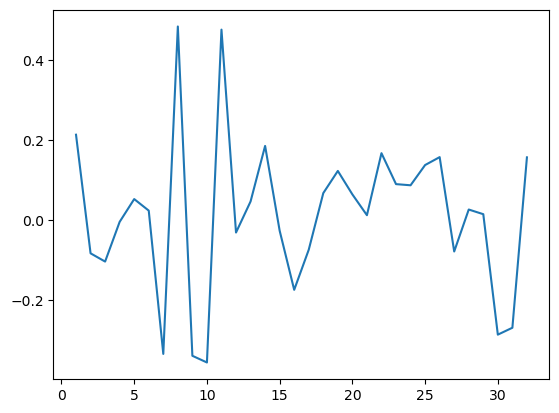

In [30]:
df_diff_diesel_price.plot()

<Axes: >

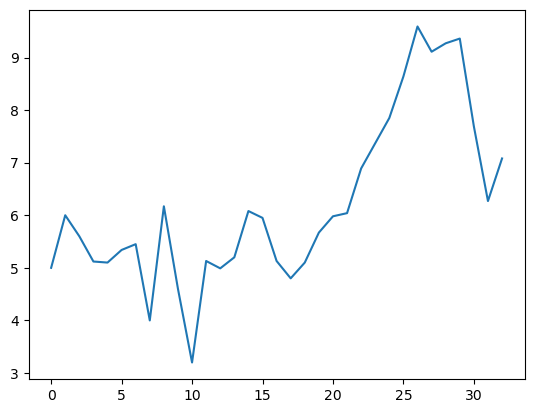

In [32]:
df_diesel_price["Diesel price"].plot()

Checking the stationarity 

In [16]:
print("******************************************")
print("   Checking the stationarity Using ADF    ")
print("******************************************")
result=adfuller(df_diff_diesel_price)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\tCritical(%s): %.3f' %(key, value))

******************************************
   Checking the stationarity Using ADF    
******************************************
Test Statistic: -6.975415
p-value: 0.000000
Critical values:
	Critical(1%): -3.661
	Critical(5%): -2.961
	Critical(10%): -2.619


The results shows that ADF test statics is negative and lesser than all critical value  and negative. So, reject the null hypothesis and decelaring the the data is stationary

In [17]:
print("******************************************")
print("   Checking the stationarity Using KPSS    ")
print("******************************************")
result_kpss_ct_log=kpss(df_diff_diesel_price,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\tCritical (%s): %.3f' %(key, value))

******************************************
   Checking the stationarity Using KPSS    
******************************************
Test Statistic: 0.500000
p-value: 0.010000
Critical values:
	Critical (10%): 0.119
	Critical (5%): 0.146
	Critical (2.5%): 0.176
	Critical (1%): 0.216


C:\Users\pandi\Shanthababu\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


The results shows that KPSS test statistics value is greater than the critical value, the null hypothesis is rejected. So, decelaring the the data is not stationary

In [33]:
np.sqrt(5)

2.23606797749979

			************************************************
			    Before and After Log - Transformation       
			            Data Distribution                   
			************************************************


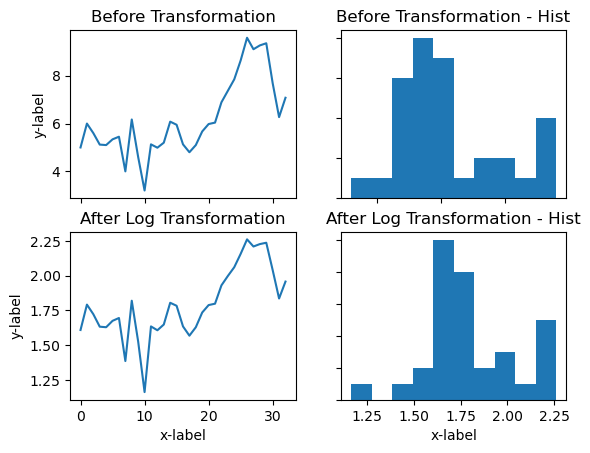

In [102]:
from matplotlib import pyplot
from math import exp
from numpy import log

print("\t\t\t************************************************")
print("\t\t\t    Before and After Log - Transformation       ")
print("\t\t\t            Data Distribution                   ")
print("\t\t\t************************************************")
fig, ax = plt.subplots(2, 2)
# line plot
ax[0,0].plot(df_diesel_price["Diesel price"])
ax[0, 0].set_title('Before Transformation')
# histogram
ax[0,1].hist(df_diesel_price["Diesel price"])
ax[0,1].set_title('Before Transformation - Hist')

ax[1,0].plot(log(df_diesel_price["Diesel price"]))
ax[1,0].set_title('After Log Transformation')
# histogram
ax[1,1].hist(log(df_diesel_price["Diesel price"]))
ax[1,1].set_title('After Log Transformation - Hist')
#plotting the grahps in grid format 
for axf in ax.flat:
    axf.set(xlabel='x-label', ylabel='y-label')

for axf in ax.flat:
    axf.label_outer()




C:\Users\pandi\AppData\Local\Temp\ipykernel_21820\2447161022.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(211)


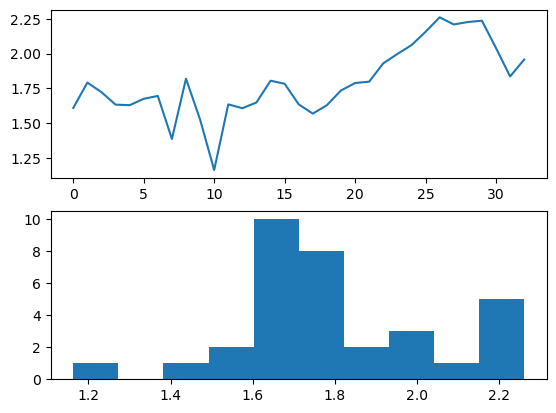

In [89]:
#pyplot.figure(1)
# line plot
#pyplot.subplot(211)
pyplot.plot(log(df_diesel_price["Diesel price"]))
# histogram

pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(log(df_diesel_price["Diesel price"]))
# histogram
pyplot.subplot(212)
pyplot.hist(log(df_diesel_price["Diesel price"]))
pyplot.show()

			************************************************
			    Before and After Cube root - Transformation 
			************************************************


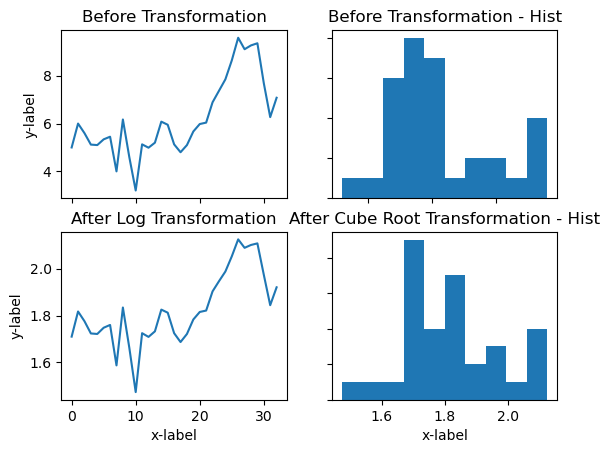

In [130]:
print("\t\t\t************************************************")
print("\t\t\t    Before and After Cube root - Transformation ")
print("\t\t\t************************************************")
fig, ax = plt.subplots(2, 2)
# line plot
ax[0,0].plot(df_diesel_price["Diesel price"])
ax[0,0].set_title('Before Transformation')

# histogram
ax[0,1].hist(df_diesel_price["Diesel price"])
ax[0,1].set_title('Before Transformation - Hist')

ax[1,0].plot(np.cbrt(df_diesel_price["Diesel price"]))
ax[1,0].set_title('After Log Transformation')


# histogram
ax[1,1].hist(np.cbrt(df_diesel_price["Diesel price"]))
ax[1,1].set_title('After Cube Root Transformation - Hist')

#plotting the grahps in grid format 
for axf in ax.flat:
    axf.set(xlabel='x-label', ylabel='y-label')

for axf in ax.flat:
    axf.label_outer()



<Axes: >

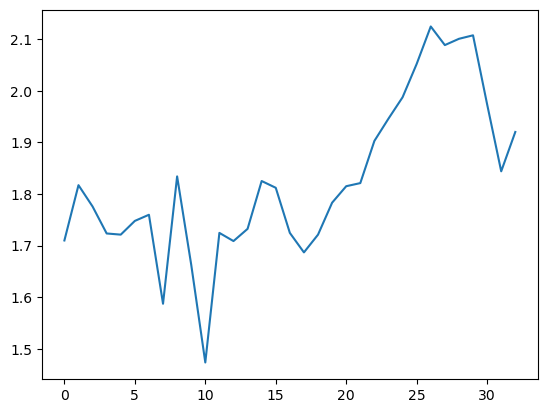

In [119]:
np.cbrt(df_diesel_price["Diesel price"]).plot()

<Axes: >

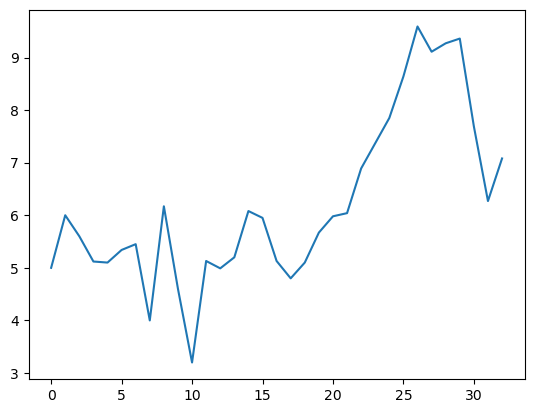

In [131]:
df_diesel_price["Diesel price"].plot()

			************************************************
			    Before and After Cube root - Transformation 
			************************************************


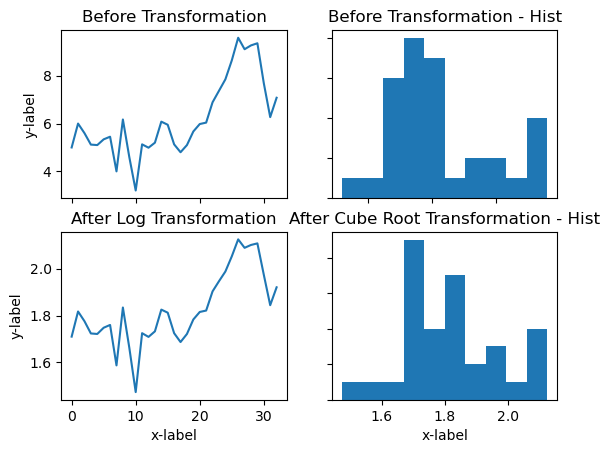

In [132]:
print("\t\t\t************************************************")
print("\t\t\t    Before and After Cube root - Transformation ")
print("\t\t\t************************************************")
fig, ax = plt.subplots(2, 2)
# line plot
ax[0,0].plot(df_diesel_price["Diesel price"])
ax[0,0].set_title('Before Transformation')

# histogram
ax[0,1].hist(df_diesel_price["Diesel price"])
ax[0,1].set_title('Before Transformation - Hist')

ax[1,0].plot(np.cbrt(df_diesel_price["Diesel price"]))
ax[1,0].set_title('After Log Transformation')


# histogram
ax[1,1].hist(np.cbrt(df_diesel_price["Diesel price"]))
ax[1,1].set_title('After Cube Root Transformation - Hist')

#plotting the grahps in grid format 
for axf in ax.flat:
    axf.set(xlabel='x-label', ylabel='y-label')

for axf in ax.flat:
    axf.label_outer()


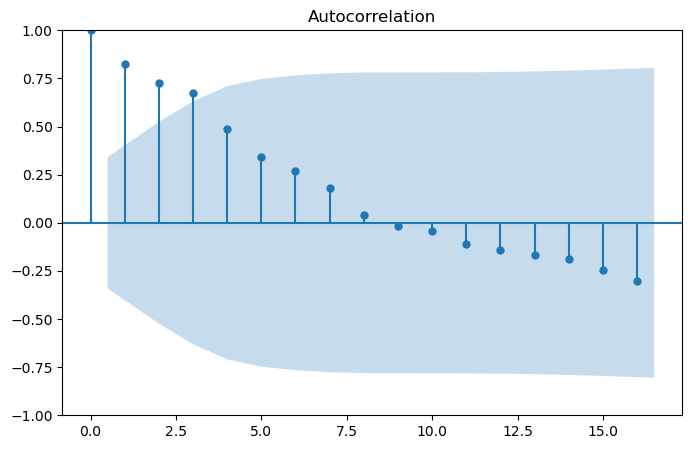

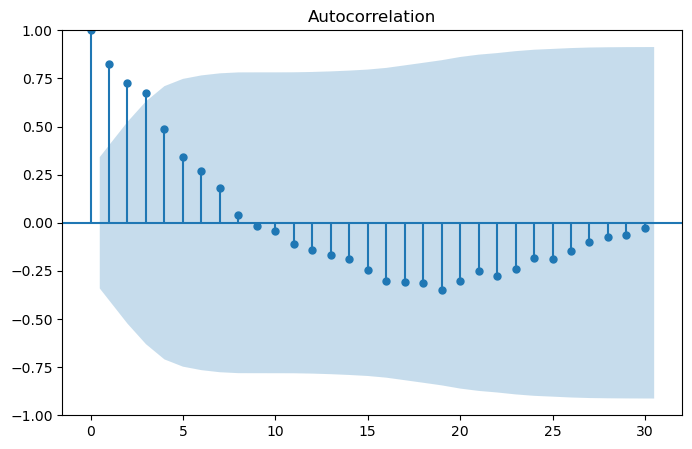

In [158]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diesel_price["Diesel price"])
plt.show()
plot_acf(df_diesel_price["Diesel price"], lags=30)
plt.show()

In [142]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

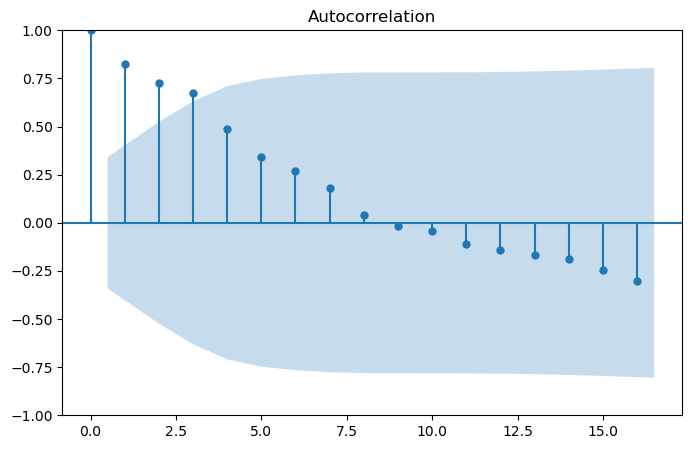

In [148]:
plt.rc("figure", figsize=(8,5))
plot_acf(df_diesel_price["Diesel price"])
pyplot.show()

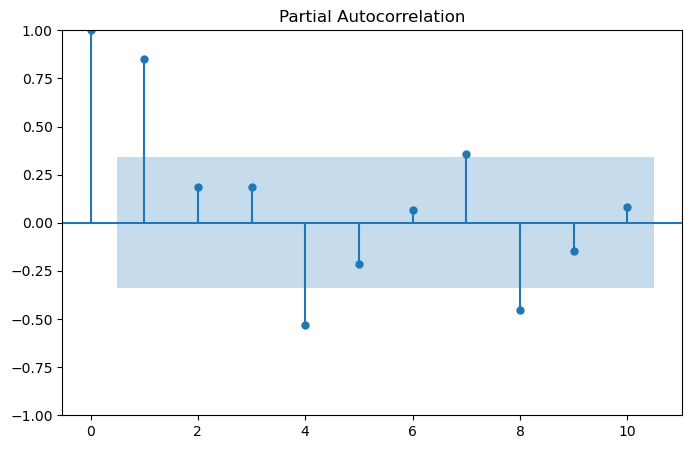

In [149]:
plot_pacf(df_diesel_price["Diesel price"], lags=10)
pyplot.show()